In [42]:
import os
import sys
import argparse
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [51]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
sys.path.append("../../simulator/carla/PythonAPI/carla/dist/carla-0.9.6-py3.5-linux-x86_64.egg")

In [3]:
import carla

In [4]:
client = carla.Client('localhost', 2000)
client.set_timeout(2.0)

In [6]:
world = client.get_world()

In [74]:
blueprint_library = world.get_blueprint_library()

In [35]:
spawn_points = world.get_map().get_spawn_points()

In [79]:
x, y, z = list(), list(), list()
indexes = list()
total_spawn_points = len(spawn_points)
for idx, point in enumerate(spawn_points):
    if point.location.x > -70 or point.location.x < -90:
        continue
    indexes.append(idx)
    x.append(point.location.x)
    y.append(point.location.y)
    z.append(point.location.z)
x = np.array(x).reshape((-1, 1))
y = np.array(y).reshape((-1, 1))
z = np.array(z).reshape((-1, 1))
indexes = np.array(indexes).reshape((-1, 1))

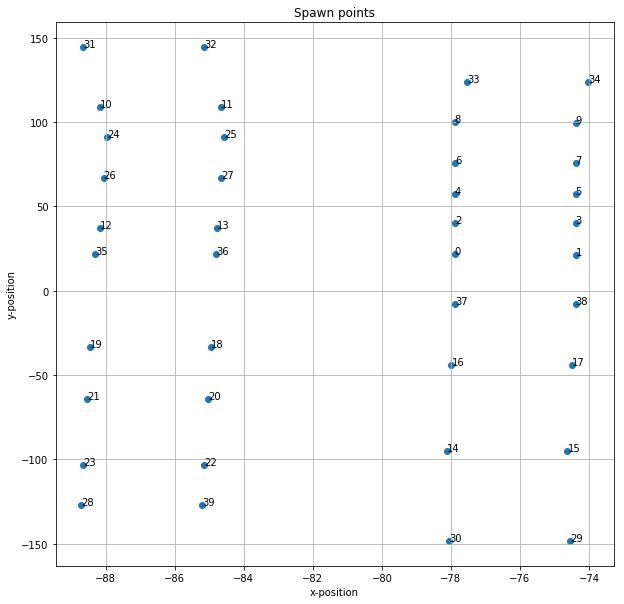

In [80]:
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.title('Spawn points')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.grid(True)

for i in range(x.shape[0]):
    ax.annotate(str(i), (x[i], y[i]))

plt.show()

In [69]:
ego_spawns = [12, 40, 42, 14, 68]

In [81]:
bp = random.choice(blueprint_library.filter('vehicle.tesla.*'))
transform = spawn_points[14]
ego_vehicle = world.spawn_actor(bp, transform)

In [ ]:
bp = random.choice(blueprint_library.filter('vehicle.tesla.*'))
transform = spawn_points[14]
ego_vehicle = world.spawn_actor(bp, transform)